#### Import important python Libraries

In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import metrics


def printmd(string):
    display(Markdown(string))
       
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


%  matplotlib inline

 #### 1. Load the data set 

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status',
                'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss',
                'hours-per-week', 'native-country','income']

train = pd.read_csv( 'C:/Users/kouame/Desktop/Adult/adult.data.csv', header=None, names = column_names, engine = 'python', na_values="?")
test = pd.read_csv('C:/Users/kouame/Desktop/Adult/test.data.csv', header=None, names = column_names, engine = 'python', na_values="?")

Adult = pd.concat([test,train])
Adult.reset_index(inplace = True, drop = True)

In [3]:
printmd('### The shape of data ')
Adult.shape

 ### The shape of data 

(48842, 15)

In [4]:
printmd("### The first five rows")
Adult.head()

### The first five rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
printmd("## Adult")
Adult.info()

## Adult

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
printmd("### Summary Statistics: Numerical Variables")
Adult.describe()

### Summary Statistics: Numerical Variables

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
printmd("### Summary Statistics: Categorical Variables")
Adult.describe(include=["object"])

### Summary Statistics: Categorical Variables

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
# Take a look at te outcome varible "income 
Adult["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [9]:
# the percentage of the unique value
Adult["income"].value_counts()/48842

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

<p> The total of the incomes less than 50k represents 76% of the observations and those greater than 50K represent 24% of the data set </p>

In [10]:
printmd("## 2. Exploratory Analysis")

## 2. Exploratory Analysis

### 2.1 Barplot of the income  variable

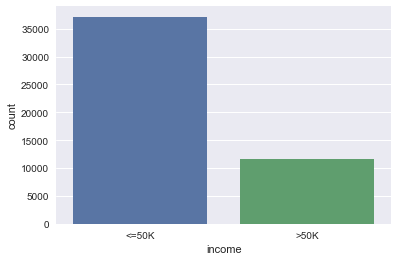

In [11]:
printmd("### 2.1 Barplot of the income  variable")

sns.countplot(x='income',data= Adult)

plt.show()

In [12]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in Adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

### 2.2 Education vs Income

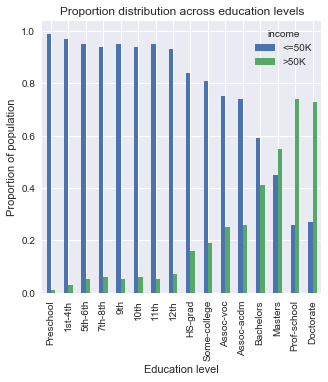

In [13]:
printmd('### 2.2 Education vs Income')

education = round(pd.crosstab(Adult.education, Adult.income).div(pd.crosstab(Adult.education, Adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (5,5))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')



### 2.3 Gender vs Income

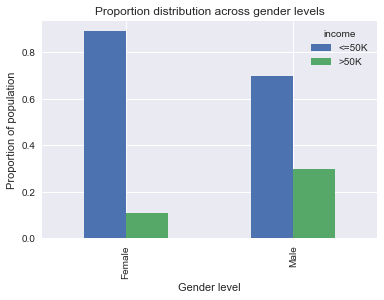

In [14]:
printmd('### 2.3 Gender vs Income')

gender = round(pd.crosstab(Adult.gender, Adult.income).div(pd.crosstab(Adult.gender, Adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels', )
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')



### 2.4 Workclass vs Income

Taking a closer look at the disparity in income between men and women, plot the         proportion of men and women who earn more than 50k a year, across all the working         classes as seen in Fig. 3. We see that men always have a higher proportion earning         more than 50k a year than women, except for the 'without.pay' working class, where         they have the same proportion.

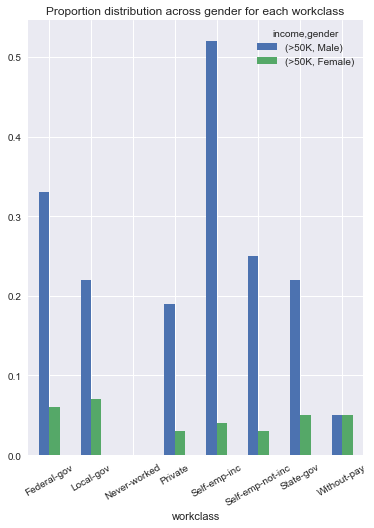

In [15]:
printmd('### 2.4 Workclass vs Income')

gender_workclass = round(pd.crosstab(Adult.workclass, [Adult.income, Adult.gender]).div(pd.crosstab(Adult.workclass, [Adult.income, Adult.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (6,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('Taking a closer look at the disparity in income between men and women, plot the \
        proportion of men and women who earn more than 50k a year, across all the working \
        classes as seen in Fig. 3. We see that men always have a higher proportion earning \
        more than 50k a year than women, except for the \'without.pay\' working class, where \
        they have the same proportion.')



### 2.5 Occupation vs Income

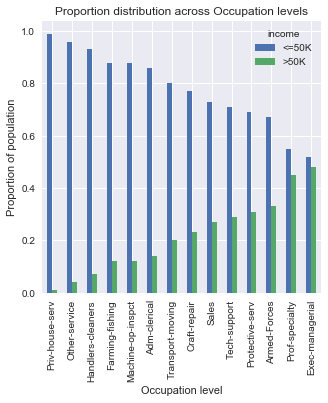

In [16]:
printmd('### 2.5 Occupation vs Income')

occupation = round(pd.crosstab(Adult.occupation, Adult.income).div(pd.crosstab(Adult.occupation, Adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (5,5))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

### 2.6 Workclass vs Income

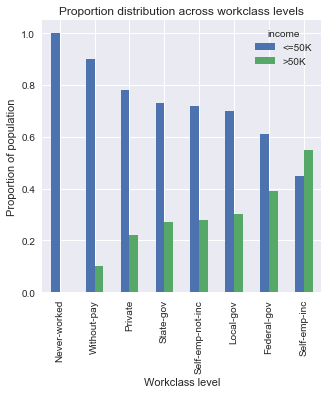

In [17]:
printmd('### 2.6 Workclass vs Income')

workclass = round(pd.crosstab(Adult.workclass, Adult.income).div(pd.crosstab(Adult.workclass, Adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (5,5))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

### 2.7 Race vs Income

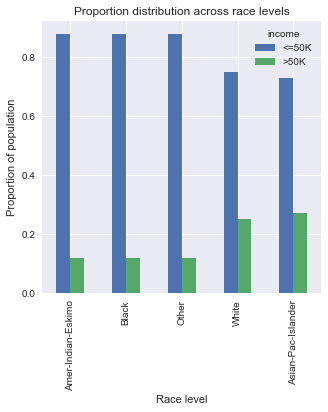

In [18]:
printmd('### 2.7 Race vs Income')

race = round(pd.crosstab(Adult.race, Adult.income).div(pd.crosstab(Adult.race, Adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (5,5))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

### 2.8 Native Country vs Income

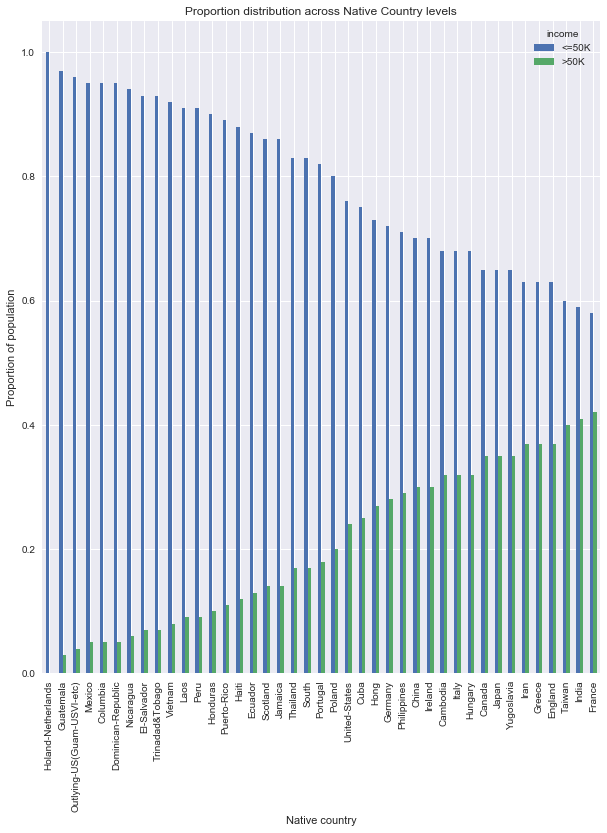

In [19]:
printmd('### 2.8 Native Country vs Income')

native_country = round(pd.crosstab(Adult['native-country'], Adult.income).div(pd.crosstab(Adult['native-country'], Adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (10,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')



### 2.9 Hours per week vs Income

I plot a bar graph showing the proportion of income classes across the hours worked.         We would expected to notice a trend that higher the hours worked per week, the higher the proportion         of population making more than 50k a year. However, this was not necessarily true from the graph.         For several hours instance (for example, where hours worked was 77, 79, 81, 82, 87, 88 and so on)         no one earned more than 50k a year. 

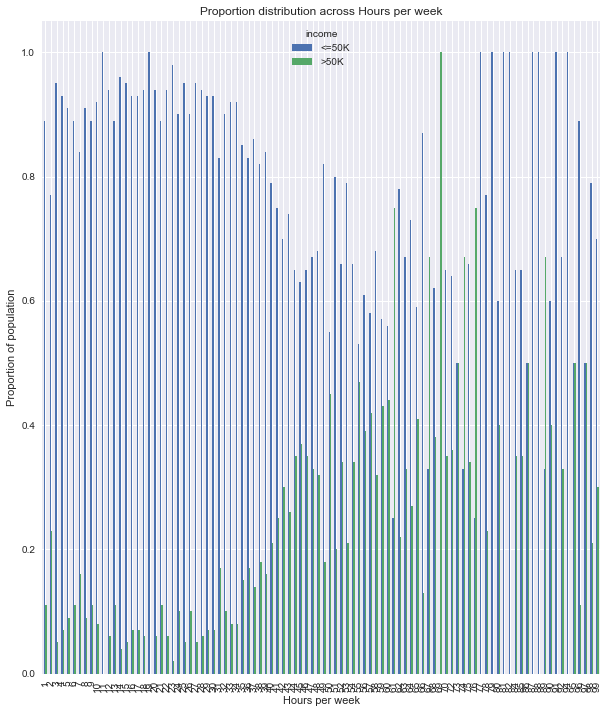

In [20]:
printmd('### 2.9 Hours per week vs Income')

hours_per_week = round(pd.crosstab(Adult['hours-per-week'], Adult.income).div(pd.crosstab(Adult['hours-per-week'], Adult.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = 1, inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

printmd('I plot a bar graph showing the proportion of income classes across the hours worked. \
        We would expected to notice a trend that higher the hours worked per week, the higher the proportion \
        of population making more than 50k a year. However, this was not necessarily true from the graph. \
        For several hours instance (for example, where hours worked was 77, 79, 81, 82, 87, 88 and so on) \
        no one earned more than 50k a year. ')

In [21]:
printmd ("## 3 Outliers")
printmd("An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.")


## 3 Outliers

An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

 ### 3.1 Age

#### 3.1.1 Age distribution

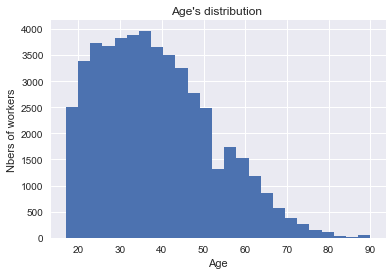

In [22]:
# First let's plot the histogram to get an idea of the distribution  
printmd(" ### 3.1 Age")
printmd("#### 3.1.1 Age distribution")
fig= Adult.age.hist(bins=25)
fig.set_title("Age's distribution ")
fig.set_xlabel( "Age" )
fig.set_ylabel( "Nbers of workers" )

<p>  Age is not normally distributed , it skewed on the left.</p>

#### 3.1.2 Age's kdeplot

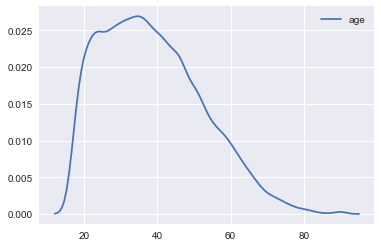

In [23]:
printmd("#### 3.1.2 Age's kdeplot")
sns.kdeplot(Adult.age )

<p> The distribution of age is skewed, so in principle we shouldn't estimate outliers using the mean plus minus 3 standard deviation, which assumes a normal distrubition.</p>
<p> Therefore we will use the interquartile range method  to find the outliers .</p>
<p> An outliers will sit ousite the following upper and lower boundaries.</P>
<p> Upper boundary =75th quantile + (IQR* 1.5). </p>
<p> Lower boundary =25th quantiles -(IQR* 1.5). </p>


#### 3.1.3  Boxplot of Age 

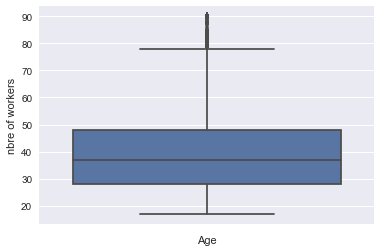

In [24]:
# another way to visualize outliers is using boxplots and whiskers , which  provides the quartiles 
printmd("#### 3.1.3  Boxplot of Age ")
fig = sns.boxplot(y="age", data= Adult)
fig.set_xlabel("Age")
fig.set_ylabel("nbre of workers")

In [25]:
# Let's look at the values of the quantiles, so we can calculate the upper and lower boundaries for the varable age 
Adult.age.describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [26]:
# Upper and lower boundaries for outliers using the interquartile proximity rules 
IQR = Adult.age.quantile(0.75)- Adult.age.quantile(0.25)
Lower_age= Adult.age.quantile(0.25)-(IQR*1.5)
Upper_age = Adult.age.quantile(0.75)+(IQR*1.5)
Upper_age, Lower_age, IQR


(78.0, -2.0, 20.0)

<p> We can see that the Upper boundary is 78.0 , the lower boundary does not make a lot sense because there is no negative age. </p> 

In [27]:
# Let's look at the actual number of workers

print('Total worker:{}'.format(Adult.shape[0]))
print('Workers that age is greater than 78.0:{}'. format(Adult[Adult.age>78].shape[0]))

Total worker:48842
Workers that age is greater than 78.0:216


In [28]:
#The pourcentage of passengers that age is greater that 78.0
Total_workers= np.float(Adult.shape[0])
print("Total_workers:{}".format(Adult.shape[0]/Total_workers))
print("Workers that age is greater than 78:{}".format(Adult[Adult.age>78].shape[0]/Total_workers))



Total_workers:1.0
Workers that age is greater than 78:0.004422423324188199


<p> As we can see  less than 0.05% of workers age is greater than 78.0 </p>

In [29]:
# Let's have a look at outliers 

Adult[Adult.age>78.0]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
193,79,NaN,48574,7th-8th,4,Widowed,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
234,80,Self-emp-not-inc,201092,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
926,79,NaN,27457,Masters,14,Never-married,NaN,Not-in-family,White,Female,0,0,23,United-States,<=50K
951,80,Private,138050,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,Female,0,0,16,United-States,<=50K
1079,81,Private,184615,7th-8th,4,Widowed,Machine-op-inspct,Unmarried,White,Female,1264,0,40,United-States,<=50K
1398,82,Self-emp-inc,220667,7th-8th,4,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
1834,83,NaN,29702,7th-8th,4,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,<=50K
2085,81,Self-emp-not-inc,240414,Bachelors,13,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,30,United-States,<=50K
2290,85,Self-emp-inc,155981,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,>50K


### 3.2 Fnlwgt

#### 3.2.1 Distribution of Fnlwgt

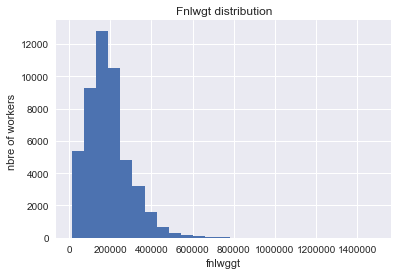

In [30]:
printmd("### 3.2 Fnlwgt")
printmd("#### 3.2.1 Distribution of Fnlwgt")
fig= Adult.fnlwgt.hist(bins=25)
fig.set_title( 'Fnlwgt distribution')
fig.set_xlabel("fnlwggt")
fig.set_ylabel("nbre of workers ")
fig.set_xlabel("fnlwggt")
fig.set_ylabel("nbre of workers ")



#### 3.2.2 Fnlwght kdeplot

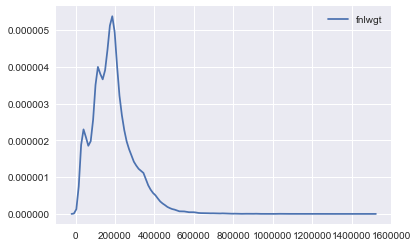

In [31]:
printmd( "#### 3.2.2 Fnlwght kdeplot") 
sns.kdeplot(Adult.fnlwgt)


<p>The variable is not normally distributed . We will calculate the quantile and then  interquartile range (IQR).</p>
<p>An outliers will sit ousite the following upper and lower boundaries.</P>
<p>Upper boundary =75th quantile + (IQR* 1.5). </p>
<p>Lower boundary =25th quantiles -(IQR* 1.5). </p>



 #### 3.2.3 Boxplot of fnlwgt 

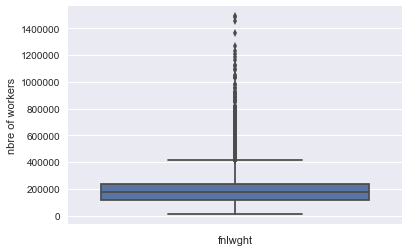

In [32]:
printmd(" #### 3.2.3 Boxplot of fnlwgt ")
fig = sns.boxplot(y = "fnlwgt", data= Adult)
fig.set_xlabel("fnlwght")
fig.set_ylabel ("nbre of workers")



In [33]:
# Upper and lower boundaries for outliers using the interquartile proximity rules 
IQR = Adult.fnlwgt.quantile(0.75)-Adult.age.quantile(0.25)
Lower_fence= Adult.fnlwgt.quantile(0.25)-(IQR*1.5)
Upper_fence = Adult.fnlwgt.quantile(0.75)+(IQR*0.75)

Lower_fence, Upper_fence, IQR

(-238870.5, 415852.5, 237614.0)

In [34]:
# Let's look at the actual number of workers  
print("total worker:{}".format(Adult.shape[0]))
print("Fnlwght greater than 415852.5:{}".format(Adult[Adult.fnlwgt> 415852.5].shape[0]))


total worker:48842
Fnlwght greater than 415852.5:1487


In [35]:
 # The pourcentage of fnlwgt greater than  415852.5 
Total_workers=np.float(Adult.shape[0])
print("Total_works:{}".format (Adult.shape[0]/Total_workers))
print( "fnlwght  greater than 41582.5:{}".format(Adult[Adult.fnlwgt>415852.5].shape[0]/Total_workers))

Total_works:1.0
fnlwght  greater than 41582.5:0.03044510871790672


<p> Only 3% of the fnlwght is greater than 415852.5 </p>

### 3.3 educational-num

#### 3.3.1 Educational-num's distribution 

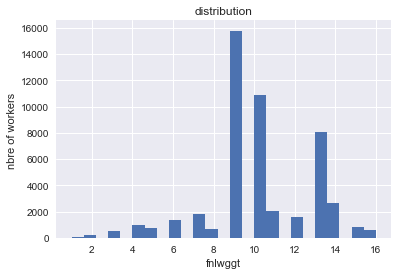

In [36]:
printmd("### 3.3 educational-num")
printmd("#### 3.3.1 Educational-num's distribution ")
fig= Adult["educational-num"].hist(bins=25)
fig.set_title("distribution")
fig.set_xlabel("fnlwggt")
fig.set_ylabel("nbre of workers ")
fig.set_xlabel("fnlwggt")
fig.set_ylabel("nbre of workers ")

#### 3.3.2 Education-num,s Kdeplot

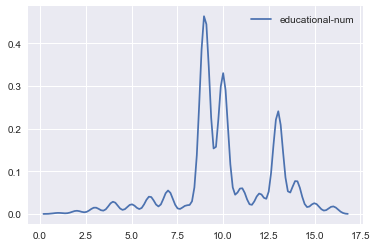

In [37]:
printmd("#### 3.3.2 Education-num,s Kdeplot")
sns.kdeplot(Adult["educational-num"])


<p> Education.num is not normally distributed.
<p> We will calculate the quantile and then interquartile range (IQR).</p>
<p>An outliers will sit ousite the following upper and lower boundaries.</p>
<p>Upper boundary =75th quantile + (IQR 1.5).</p> 
<p>Lower boundary =25th quantiles -(IQR 1.5).</p>

#### 3.3.3 boxplot of Educational-num

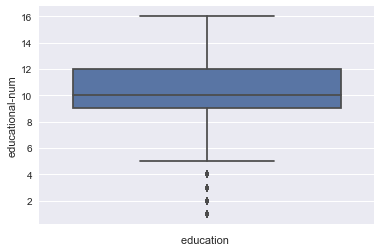

In [38]:
printmd("#### 3.3.3 boxplot of Educational-num")
fig= sns.boxplot( y= "educational-num", data= Adult)
fig.set_xlabel("education ")

In [39]:
IQR = Adult["educational-num"].quantile(0.75)-Adult["educational-num"].quantile(0.25)
Lower_fence= Adult["educational-num"].quantile(0.25)-(IQR*1.5)
Upper_fence = Adult["educational-num"].quantile(0.75)+(IQR*0.75)
Lower_fence, Upper_fence, IQR

(4.5, 14.25, 3.0)

In [40]:
# Let's look at the actual number of workers  
print("Total worker:{}".format(Adult.shape[0]))
print("Education.num less than 4.5:{}".format(Adult[Adult["educational-num"]<4.5].shape[0]))


Total worker:48842
Education.num less than 4.5:1794


In [41]:
# # The pourcentage of education less than  4.5 
Total_workers=np.float(Adult.shape[0])
print("Total_works:{}".format (Adult.shape[0]/Total_workers))
print( "educational-num less than 4.5:{}".format(Adult[Adult["educational-num"]<4.5].shape[0]/Total_workers))

Total_works:1.0
educational-num less than 4.5:0.036730682609229764


<p> Only 3% of the education.num is less than 4.5 </p>

### 3.4 Capital-gain

#### 3.4.1 Capital-gain's distribution

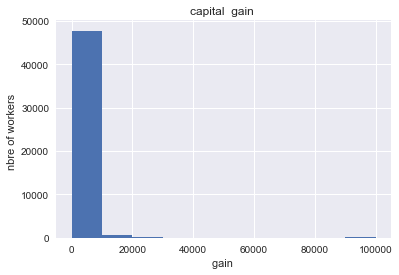

In [42]:
printmd("### 3.4 Capital-gain")
printmd("#### 3.4.1 Capital-gain's distribution")
fig= Adult["capital-gain"].hist(bins=10)
fig.set_title( 'capital  gain ')
fig.set_xlabel("gain ")
fig.set_ylabel("nbre of workers ")

#### 3.4.2 Kdeplot of Capital gain

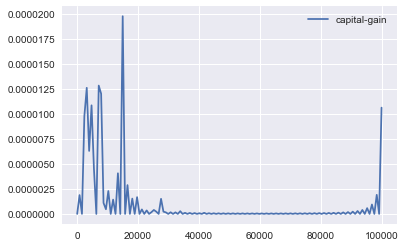

In [43]:
printmd("#### 3.4.2 Kdeplot of Capital gain")
sns.kdeplot(Adult["capital-gain"])

#### 3.4.3  Boxplot of capital gain

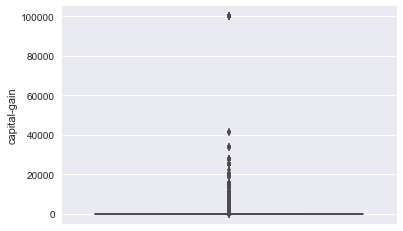

In [44]:
printmd("#### 3.4.3  Boxplot of capital gain")
sns.boxplot(y="capital-gain", data= Adult)

In [45]:
# determine the upper and lower boundary 

Upper_boundary=Adult["capital-gain"].mean()+3*Adult["capital-gain"].std()
Lower_boundary=Adult["capital-gain"].mean()-3*Adult["capital-gain"].std()

Upper_boundary,Lower_boundary 

(23435.124799183675, -21276.98954673701)

In [46]:
# percentage of outliers 

print("capital.gain greater than 23435:{}".format(Adult[Adult["capital-gain"]>23435].shape[0]/Total_workers))

capital.gain greater than 23435:0.006776954260677286


<p> Only 0,6% are greater than  the Upper_boundary </p>

### 3.5  Capital-loss

#### 3.5.1 Capital-loss's distribution

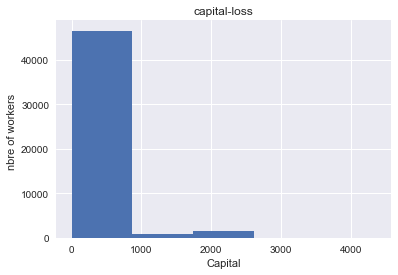

In [47]:
printmd("### 3.5  Capital-loss")
printmd("#### 3.5.1 Capital-loss's distribution")
fig= Adult["capital-loss"].hist(bins=5)
fig.set_title( 'capital-loss')
fig.set_xlabel("Capital")
fig.set_ylabel("nbre of workers ")

### 3.5.2 capital-loss' kdeplot

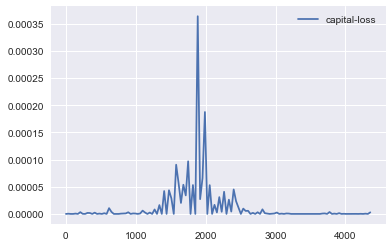

In [48]:
printmd("### 3.5.2 capital-loss' kdeplot")
sns.kdeplot(Adult["capital-loss"])

#### 3.5.3 boxplot of capital-loss

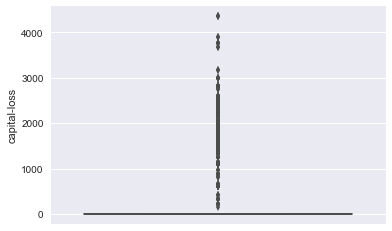

In [49]:
printmd("#### 3.5.3 boxplot of capital-loss")
sns.boxplot(y = "capital-loss",  data=Adult)


In [50]:
Upper_boundary= Adult["capital-loss"].mean()+3*Adult["capital-loss"].std()
Lower_boundary= Adult["capital-loss"].mean()-3*Adult["capital-loss"].std()
Upper_boundary , Lower_boundary 

(1296.515969955938, -1121.5113427907932)

In [51]:
# percentage of  outliers 

print( "capital-loss grater than 1296:{}".format(Adult[Adult["capital-loss"]>1296].shape[0]/Total_workers))

capital-loss grater than 1296:0.04537078743704189


<p> only 4% of capital loss are greater than  1296 </p>

### 3.6 Hours- per-weeks

#### 3.6.1  Hours-per-weeks'distribution

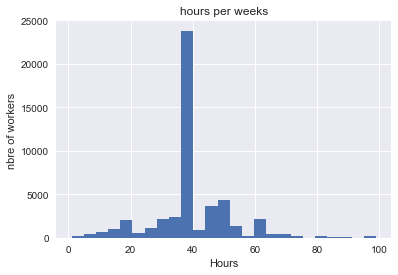

In [52]:
printmd("### 3.6 Hours- per-weeks")
printmd("#### 3.6.1  Hours-per-weeks'distribution")
fig= Adult["hours-per-week"].hist(bins=25)
fig.set_title( 'hours per weeks')
fig.set_xlabel("Hours")
fig.set_ylabel("nbre of workers ")

 #### 3.6.2 Hours per Weeks'kdeplot

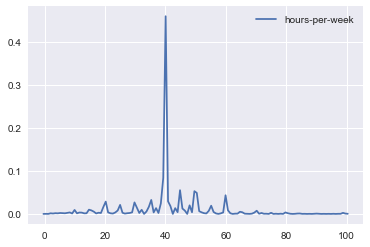

In [53]:
printmd(" #### 3.6.2 Hours per Weeks'kdeplot")
sns.kdeplot(Adult["hours-per-week"])


 3 6.3 boxplot of hour per week

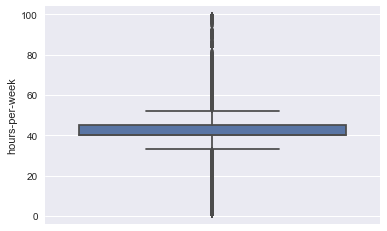

In [54]:
printmd( " 3 6.3 boxplot of hour per week")
sns.boxplot(y= "hours-per-week", data= Adult )

In [55]:
# let's  determine the Upper and Lower boundary 

Upper_boundary= Adult["hours-per-week"].mean()+3*Adult["hours-per-week"].std()
Lower_boundary= Adult["hours-per-week"].mean()-3*Adult["hours-per-week"].std()

Upper_boundary, Lower_boundary  

(77.59671444859188, 3.2480503030562957)

In [56]:
#   percentage of outliers  
print("hours-per-week  gretaer than 77:{}".format(Adult[Adult["hours-per-week"]>77].shape[0]/Total_workers))
print("hours-per-week  less than 3:{}".format(Adult[Adult["hours-per-week"]<3].shape[0]/Total_workers))


hours-per-week  gretaer than 77:0.01109700667458335
hours-per-week  less than 3:0.0016379345645141476


 <p> The outliers represent only 1,2%  </p>

In [57]:
printmd('### 4. Remove the outliers , using top-coding and bottom-coding method')
print 

### 4. Remove the outliers , using top-coding and bottom-coding method

<function print>

<p> Top-coding and Botton-coding, as any features preprocessing step,  should be determined over the training set  and then transferred  onto the test set. This means  that we should find upper and lower bounds in training set only , and use those bounds to cap the values in the  test set.</p>

In [58]:
# Divide the data into  train and test set 
X_train,X_test, y_train, y_test=train_test_split(Adult,  Adult.income, test_size=0.3, random_state=0)

X_train.shape, X_test.shape


((34189, 15), (14653, 15))

In [59]:
# let's  use the top -coding to for variable age 
# the upper boundary  for age  equal to 78.0 , all the values above the upper boundary are outliers 

Upper_age

78.0

In [60]:
#   top-coding capping the variable  age at 78

X_train.loc[X_train.age>78,"age"]=78
X_test.loc[X_test.age>78,"age"]=78
X_train.age.max(), X_test.age.max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(78, 78)

In [61]:
#   top-coding capping the variable fnlwgt at 41582

X_train.loc[X_train.fnlwgt>41582,"fnlwgt"]=41582
X_test.loc[X_test.fnlwgt>41582,"fnlwgt"]=41582
X_train.fnlwgt.max(), X_test.fnlwgt.max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(41582, 41582)

In [62]:
#   top-coding capping the variable education.num at 4

X_train.loc[X_train["educational-num"]>4, "educational-num"]=4
X_test.loc[X_test["educational-num"]>4,"educational-num"]=4
X_train["educational-num"].max(), X_test["educational-num"].max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(4, 4)

In [63]:
#   top-coding capping the variable capital.gain at 23435

X_train.loc[X_train["capital-gain"]>23435,"capital-gain"]=23435
X_test.loc[X_test["capital-gain"]>23435,"capital-gain"]=23435
X_train["capital-gain"].max(), X_test["capital-gain"].max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(23435, 23435)

In [64]:
#   top-coding capping the variable capital.loss at 1296
X_train.loc[X_train["capital-loss"]>1296,"capital-loss"]=1296
X_test.loc[X_test["capital-loss"]>1296,"capital-loss"]=1296
X_train["capital-loss"].max(), X_test["capital-loss"].max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(1296, 1296)

In [65]:
#   top-coding capping the variable  hors.per.week at 77 

X_train.loc[X_train["hours-per-week"]>77,"hours-per-week"]=77
X_test.loc[X_test["hours-per-week"]>77,"hours-per-week"]=77
X_train["hours-per-week"].max(), X_test["hours-per-week"].max()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(77, 77)

In [66]:
#  bottom-coding capping the variable hours.per.week  age at 3

X_train.loc[X_train["hours-per-week"]<3,"hours-per-week"]=3
X_test.loc[X_test["hours-per-week"]<3, "hours-per-week"]=3
X_train["hours-per-week"].min(), X_test["hours-per-week"].min()

C:\Users\kouame\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(3, 3)

In [67]:
printmd("### 5. Handle missing value" )

### 5. Handle missing value

In [68]:
Adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [69]:
Adult[["workclass","occupation" ,"native-country"]].isnull().mean()

workclass         0.057307
occupation        0.057512
native-country    0.017546
dtype: float64

<p>The variable workclass, occupation, and native-country contain only a few observations with NA (5% ,5% and 1% respectively),</p> 
<p>therefore replacing those observations with the value of the most frequent category is a good approach. </p>

In [70]:
printmd("### 5.1 Imputation Importance")

### 5.1 Imputation Importance

<p> let's inspect the frequency of the label in the different variables.</p>

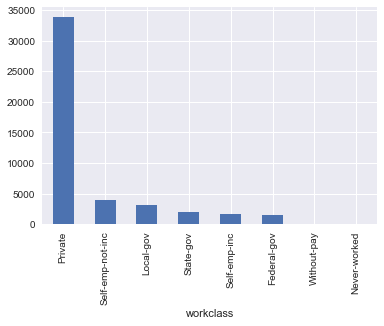

In [71]:
Adult.groupby(["workclass"])["workclass"].count().sort_values(ascending= False).plot.bar()

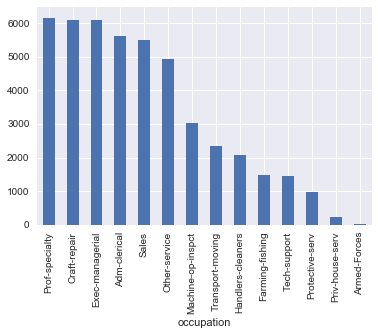

In [72]:
Adult.groupby(["occupation"])["occupation"].count().sort_values(ascending= False).plot.bar()

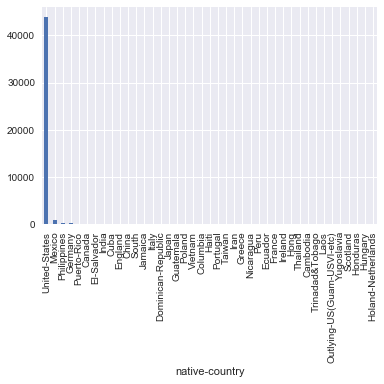

In [73]:
Adult.groupby(["native-country"])["native-country"].count().sort_values(ascending= False).plot.bar()

In [74]:
# with this command we capture the most frequent label 

In [75]:
most_frequent_variable=Adult.groupby(["workclass"])["workclass"].count().sort_values(ascending= False).index[0]
most_frequent_variable

'Private'

In [76]:
most_frequent_variable= Adult.groupby(["occupation"])["occupation"].count().sort_values(ascending= False).index[0]
most_frequent_variable 

'Prof-specialty'

In [77]:
most_frequent_variable= Adult.groupby(["native-country"])["native-country"].count().sort_values(ascending= False).index[0]
most_frequent_variable 

'United-States'

In [78]:
# let's fill the missing values  by the most frequent varible "Private" 

Adult["workclass"].fillna(most_frequent_variable, inplace=True)

In [79]:
# let's fill the missing values by the most  frequent variable "Prof-speciality"

Adult["occupation"].fillna(most_frequent_variable, inplace=True)

In [80]:
#let's  fill  the missing values by the most frequent variable "United-states"

Adult["native-country"].fillna(most_frequent_variable, inplace= True)

In [81]:
# let's check that NA have been replace by inspecting the percentage of null values
Adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [82]:
# Take a look at the outcome variable: 'income'
print(Adult['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [83]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
Adult['income'] = [0 if x == '<=50K' else 1 for x in Adult['income']]



In [84]:

print(Adult.head(5))

   age      workclass  fnlwgt     education  educational-num  \
0   25        Private  226802          11th                7   
1   38        Private   89814       HS-grad                9   
2   28      Local-gov  336951    Assoc-acdm               12   
3   44        Private  160323  Some-college               10   
4   18  United-States  103497  Some-college               10   

       marital-status         occupation relationship   race  gender  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married      United-States    Own-child  White  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0             0             0              40  United-States       0  
1             0             0           

In [85]:
 # Education is a categorical feature:
print(Adult['education'].unique())

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [86]:
 #Education is a categorical feature:
print(Adult['education'].head(5))

0            11th
1         HS-grad
2      Assoc-acdm
3    Some-college
4    Some-college
Name: education, dtype: object


In [87]:
# Use get_dummies in pandas 
print(pd.get_dummies(Adult['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [88]:
# Decide which categorical variables you want to use in model
for col_name in Adult.columns:
    if Adult[col_name].dtypes == 'object':
        unique_cat = len(Adult[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'gender' has 2 unique categories
Feature 'native-country' has 41 unique categories


In [89]:
 #Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(Adult['native-country'].value_counts().sort_values(ascending=False))

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [90]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(Adult['native-country'].value_counts()/48842)

United-States                 0.914971
Mexico                        0.019471
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Nicaragua                     0.001003
Greece                   

<p> Indeed! 91% of the samples are for people from the US. Mexico comes next with less than 2%.   </p>

In [91]:
# In this case, bucket low frequecy categories as "Other"
Adult['native-country'] = ['United-States ' if x == 'United-States' else 'Other' for x in Adult['native-country']]

print(Adult['native-country'].value_counts().sort_values(ascending=False))

United-States     44689
Other              4153
Name: native-country, dtype: int64


In [92]:
Adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [93]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [94]:
#Function to dummy all the categorical variables used for modeling
def dummy_Adult(Adult, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(Adult[x], prefix=x, dummy_na=False)
        Adult = Adult.drop(x, 1)
        Adult = pd.concat([Adult, dummies], axis=1)
    return Adult

In [95]:
Adult = dummy_Adult(Adult, todummy_list)
print(Adult.head())

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0       0                      0                    0                       0   
1       0                      0                    0                       0   
2       1                      0                    1                       0   
3       1                      0                    0                       0   
4       0                      0                    0                       0   

               ...                rela

In [96]:
#  Let's look at the different columns of the  data set 
Adult.columns 


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_United-States',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
    

In [97]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 69 columns):
age                                     48842 non-null int64
fnlwgt                                  48842 non-null int64
educational-num                         48842 non-null int64
capital-gain                            48842 non-null int64
capital-loss                            48842 non-null int64
hours-per-week                          48842 non-null int64
income                                  48842 non-null int64
workclass_Federal-gov                   48842 non-null uint8
workclass_Local-gov                     48842 non-null uint8
workclass_Never-worked                  48842 non-null uint8
workclass_Private                       48842 non-null uint8
workclass_Self-emp-inc                  48842 non-null uint8
workclass_Self-emp-not-inc              48842 non-null uint8
workclass_State-gov                     48842 non-null uint8
workclass_United-States              

In [98]:
printmd("## 6. Features Selection ")

## 6. Features Selection 

In [99]:
# let's split the  adult data in train and test set
X_train, X_test, y_train, y_test= train_test_split (Adult.drop( ["income" ] , axis =1), Adult["income"],  test_size= 0.3, random_state =0)

X_train.shape, X_test.shape

((34189, 68), (14653, 68))

In [100]:
printmd(" ### 6.1 Remove Constant features")

 ### 6.1 Remove Constant features

In [101]:
Constant_features = [feat for feat in X_train.columns  if X_train[feat].std()==0]
X_train.drop(labels=Constant_features, axis =1, inplace= True)
X_test.drop(labels=Constant_features, axis =1 , inplace= True) 


In [102]:
X_train.shape, X_test.shape

((34189, 68), (14653, 68))

<p>  There are not constant features in the data set </p>

In [103]:
printmd(" ### 6.2 Remove  quaisi-constant features"  )

 ### 6.2 Remove  quaisi-constant features

In [104]:
from sklearn.feature_selection import VarianceThreshold 

In [105]:
sel = VarianceThreshold(threshold= 0.01 ) # 0.01 indicates 99% of observations approximatively 
sel.fit(X_train)
sum(sel.get_support())

58

In [106]:
# features to keep 

features_to_keep = X_train.columns[sel.get_support()]

In [107]:
# Now We can remove  the features  
X_train= sel.transform(X_train)
X_test= sel.transform(X_test )
X_train.shape, X_test.shape 




((34189, 58), (14653, 58))

In [108]:
# sklearn  transformations lead to numpy arrays 
# here I transform the array  back to  dataframe
X_train =pd.DataFrame(X_train)
X_train.columns = features_to_keep 

X_test= pd.DataFrame(X_test)
X_test.columns= features_to_keep

X_train.shape, X_test.shape

((34189, 58), (14653, 58))

In [109]:
printmd("### 6.3 Remove duplicated  features")

### 6.3 Remove duplicated  features

In [110]:
#check for duplicated features in the training set 

duplicated_feat= []

for i in range(0, len(X_train.columns)):
    if i% 10==0: # this helps  me to understand  how the loop is going 
        print(i)
        
    col_1 = X_train.columns[i]
    
    for col_2 in X_train.columns [i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
    





0
10
20
30
40
50


In [111]:
len(duplicated_feat)

0

<p> there are not duplicated  features </p>

In [112]:
my_features = list(features_to_keep) 
len(my_features)

58

In [113]:
my_features.append("income")
len(my_features)

59

In [114]:
features_to_keep=list(my_features)
len(features_to_keep)

59

In [115]:
features = list( Adult.columns)
features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_United-States',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_C

In [116]:
features_to_drop= [feature for feature in features if feature not in features_to_keep]

In [117]:
Adult.drop(features_to_drop,axis=1 , inplace=True)

In [118]:
Adult.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_United-States', 'education_10th', 'education_11th',
       'education_12th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupatio

In [119]:
printmd("### 6.4 Correlated features ")

### 6.4 Correlated features 

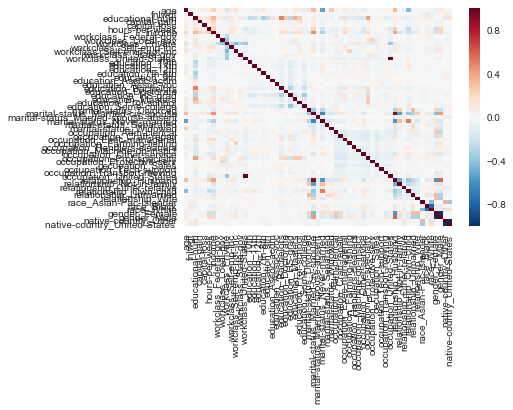

In [120]:
sns.heatmap(Adult.corr())
plt.show()

In [121]:
# features selection 
# we will use the brute force approach 
printmd(" #### With the function  we can  select highly correlates features" )

 #### With the function  we can  select highly correlates features

In [122]:
 
def correlation ( dataset, threshold):
    col_corr= set() # set of all the names of correlated columns 
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix .columns)):
        for j in range (i):
            if abs( corr_matrix.iloc[i, j]) > threshold: # we are interested in absoluhtes coefficient of correlation 
                colname= corr_matrix .columns [i] # getting the name of column 
                col_corr.add(colname)
    return col_corr
 

In [123]:
corr_features= correlation (Adult, 0.8)
len(set(corr_features))

4

In [124]:
corr_features

{'gender_Male',
 'native-country_United-States ',
 'occupation_United-States',
 'relationship_Husband'}

In [125]:
Adult.drop(['gender_Male', 'native-country_United-States ','occupation_United-States','relationship_Husband'], axis=1 , inplace= True)

In [126]:
Adult.shape

(48842, 55)

In [127]:
Adult.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_United-States', 'education_10th', 'education_11th',
       'education_12th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupatio

In [128]:
# Split the data set 

X_train,X_test, y_train, y_test=train_test_split(Adult.drop(["income"] , axis =1),  Adult.income, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((34189, 54), (14653, 54))

In [129]:
# let's check the variables that share the same information 
from sklearn.feature_selection import mutual_info_classif
from  sklearn.feature_selection import SelectKBest, SelectPercentile 

In [130]:
printmd("### 6.5  Mutual Information"  )

### 6.5  Mutual Information

In [131]:
# Calculate the mutual information between the varaibles and the target 
# this returns  the mutual information value of each  feature
# the smaller the value the less information the feature has about the target

mi = mutual_info_classif( X_train.fillna(0), y_train)
mi


array([  6.65279148e-02,   3.12984421e-02,   6.58763214e-02,
         7.94348565e-02,   3.25708203e-02,   3.74238821e-02,
         2.74292569e-03,   3.97065729e-05,   4.33307792e-03,
         5.98262729e-03,   1.62785019e-03,   0.00000000e+00,
         4.78809976e-03,   1.94158148e-03,   5.45270801e-03,
         1.54567349e-03,   6.07765698e-03,   8.51314251e-04,
         5.88418551e-04,   6.31828868e-04,   1.71978729e-02,
         4.74052594e-03,   1.27602819e-02,   1.73374317e-02,
         1.20260333e-02,   1.26801280e-03,   9.97007793e-03,
         1.08171750e-01,   1.81960474e-03,   5.96281034e-02,
         3.41169977e-03,   5.80514230e-03,   3.60741744e-03,
         1.98268811e-03,   1.90946301e-02,   2.46217430e-03,
         2.88589225e-03,   2.63430085e-03,   1.68930123e-02,
         1.36548429e-02,   5.24437224e-03,   2.10538893e-03,
         0.00000000e+00,   9.34123686e-04,   2.07309199e-02,
         3.74841370e-03,   3.55272706e-02,   1.14598780e-02,
         8.18639608e-03,

 <p> Mutual information measures the information that the predictor and target share  </p>

In [132]:
# let's have a series for clear visualization
mi = pd.Series(mi)
mi.index= X_train.columns
mi.sort_values(ascending=False )

marital-status_Married-civ-spouse       0.108172
capital-gain                            0.079435
age                                     0.066528
educational-num                         0.065876
marital-status_Never-married            0.059628
hours-per-week                          0.037424
relationship_Own-child                  0.035527
capital-loss                            0.032571
fnlwgt                                  0.031298
gender_Female                           0.027135
relationship_Not-in-family              0.020731
occupation_Exec-managerial              0.019095
education_Masters                       0.017337
education_Bachelors                     0.017198
occupation_Other-service                0.016893
occupation_Prof-specialty               0.013655
education_HS-grad                       0.012760
education_Prof-school                   0.012026
relationship_Unmarried                  0.011460
marital-status_Divorced                 0.009970
relationship_Wife   

 #### we can see that there a few features( left of the plot ) that seems to contribute the most to predict the target

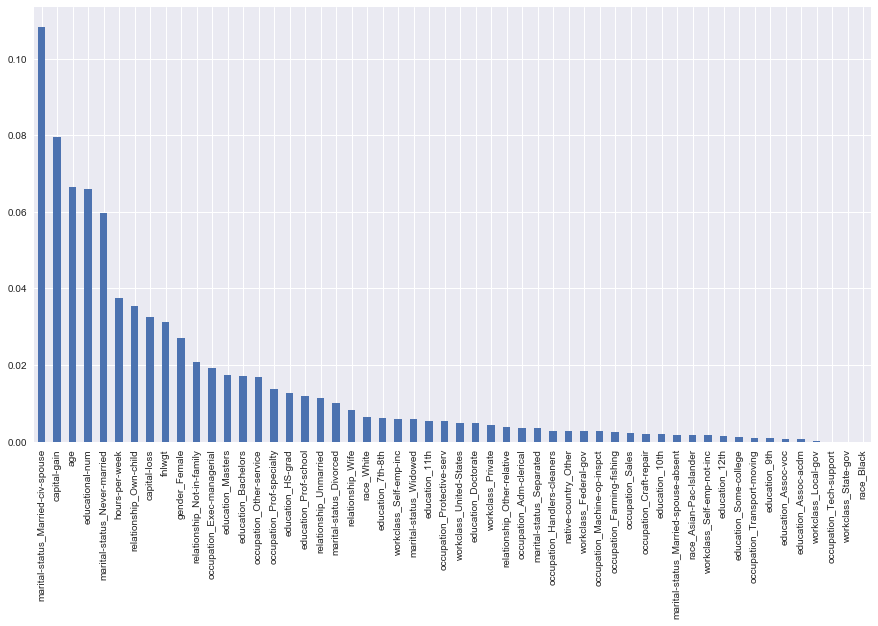

In [133]:
# and now  let's plot  the ordered Mi values per feature
mi.sort_values (ascending=False).plot.bar(figsize= (15, 8))
printmd(" #### we can see that there a few features( left of the plot ) that seems to contribute the most to predict the target")

In [134]:
printmd("### 6.6 Select the top 20 features")

### 6.6 Select the top 20 features

In [135]:
# here I will select  the top 20 features 
# which  are shown below 

sel_= SelectKBest(mutual_info_classif, k=20).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Self-emp-inc', 'education_Bachelors',
       'education_HS-grad', 'education_Masters', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'occupation_Prof-specialty', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'gender_Female'],
      dtype='object')

In [136]:
selected_features= list(X_train.columns[sel_.get_support()])

In [137]:
selected_features.append('income')

In [138]:
len(selected_features)

21

In [139]:
features =list(Adult.columns)
features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_United-States',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Pr

In [140]:
features_to_drop = [feature for feature in features if feature not in selected_features]

In [141]:
Adult.drop(features_to_drop,axis=1 , inplace=True)

In [142]:
Adult.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Self-emp-inc',
       'education_Bachelors', 'education_HS-grad', 'education_Masters',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'gender_Female'],
      dtype='object')

In [143]:
len(Adult.columns)

21

In [144]:
printmd("### 7. Model development")

### 7. Model development

In [145]:
# let's separate the adut data in train andt test set 

X_train,X_test, y_train, y_test=train_test_split(Adult.drop(["income"] , axis =1),  Adult.income, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((34189, 20), (14653, 20))

In [146]:
printmd("#### 7.1 Logistic Regression Model"  )
printmd("##### fit the logistic refression on the training set")

#### 7.1 Logistic Regression Model

##### fit the logistic refression on the training set

In [147]:
printmd("#### Predicting the test set results and creating confusion matrix")

#### Predicting the test set results and creating confusion matrix

In [148]:
logit = LogisticRegression(random_state=0)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<p>The confusion_matrix() function will calculate a confusion matrix and return the result as an array</p>

In [149]:
y_pred = logit.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10763   375]
 [ 2575   940]]


The result is telling us that we have 10763+940 correct predictions and 2575+375 incorrect predictions

In [150]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.97      0.88     11138
          1       0.71      0.27      0.39      3515

avg / total       0.78      0.80      0.76     14653



In [151]:
print(' LogReg Accuracy:{}'.format(logit.score(X_test, y_test)))
      

 LogReg Accuracy:0.7986760390363749


In [152]:
print('LogReg roc_auc:{}'.format(roc_auc_score(y_test, y_pred)))

LogReg roc_auc:0.6168783989402828


In [153]:
 printmd("### 7.2 Support Vector Machine Model")

### 7.2 Support Vector Machine Model

In [154]:
from sklearn.svm import SVC 

In [155]:
model =SVC(random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11022   116]
 [ 3419    96]]


<p>The result is telling us that we have 11019+97 (11116) correct predictions and 3418+119 ( 3537 ) incorrect predictions</p>

In [157]:
print( classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.99      0.86     11138
          1       0.45      0.03      0.05      3515

avg / total       0.69      0.76      0.67     14653



In [158]:
print('Accuracy of SVC classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of SVC classifier on test set: 0.76


In [159]:
print('model roc_auc:{}'.format(roc_auc_score(y_test, y_pred)))

model roc_auc:0.5084483629275759


In [160]:
printmd("### 7.3 Adaboost")

### 7.3 Adaboost

In [161]:
ada= AdaBoostClassifier(n_estimators= 100, random_state=0)
ada.fit (X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0)

In [162]:
printmd("#### Predicting the test set results and creating confusion matrix")

#### Predicting the test set results and creating confusion matrix

In [163]:
y_pred = ada.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10552   586]
 [ 1396  2119]]


<p>The result is telling us that we have 10520+2114(12634) correct predictions and 1401+618 (2019) incorrect predictions.</p>

In [164]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     11138
          1       0.78      0.60      0.68      3515

avg / total       0.86      0.86      0.86     14653



In [165]:
print(' adaBoost Accuracy:{}'.format(ada.score(X_test, y_test)))
      

 adaBoost Accuracy:0.8647375963966423


In [166]:
print('adaBoost roc_auc:{}'.format(roc_auc_score(y_test, y_pred)))

adaBoost roc_auc:0.7751161364462439


In [167]:
printmd("### 7.4 Random Forest")

### 7.4 Random Forest

In [168]:
rf = RandomForestClassifier(n_estimators= 100, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [169]:
printmd("#### Predicting the test set results and creating confusion matrix")

#### Predicting the test set results and creating confusion matrix

In [170]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10287   851]
 [ 1343  2172]]


<p>The result is telling us that we have 10280+2172( 12452) correct predictions and 1343+858 (2201) incorrect predictions.</p>

In [171]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     11138
          1       0.72      0.62      0.66      3515

avg / total       0.84      0.85      0.85     14653



In [172]:
print(' rf Accuracy:{}'.format(rf.score(X_test, y_test)))
      

 rf Accuracy:0.8502695693714598


In [173]:
print(' rf roc_auc:{}'.format(roc_auc_score(y_test, y_pred)))

 rf roc_auc:0.7707590433427066
